In [15]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [17]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
# You can only unzip a zipped tuple once before it is removed from the computer's memory. 
# Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

In [18]:
coordinates

[(-42.64522837002607, 116.6601115572164),
 (4.175408770573483, -161.03491323556085),
 (9.782761836563523, 133.49988109426482),
 (0.9853411711983711, 66.26452098654357),
 (28.54360303436232, 50.44390255222581),
 (61.36016529121392, 58.83221359131849),
 (-46.76792830170467, -85.51859754401181),
 (20.123522076841056, 106.87764883059117),
 (8.34872490425947, 47.06718101922891),
 (63.15991508921775, -11.39759914016588),
 (-80.63957669765469, 22.7553401409057),
 (22.441052349123893, 165.01644021046405),
 (-14.359651229568598, 88.95419064362716),
 (-3.779639404679216, 10.252941710006837),
 (-77.9326961757785, 7.084629414675021),
 (-39.78937844145475, 60.8035268964922),
 (-33.056126086919974, -109.36161043819753),
 (14.191507887314785, -161.2133615734546),
 (-46.86958205382971, 11.577751204477408),
 (8.5430368149553, -33.05694546339225),
 (-27.578274798325587, -101.6983052761407),
 (-70.40527874057895, -1.7311939701365873),
 (-5.3125259250942065, 137.9719122339631),
 (-65.62236688033809, 130.3

In [19]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [20]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [26]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [28]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [29]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | meyungs
City not found. Skipping...
Processing Record 4 of Set 1 | thinadhoo
Processing Record 5 of Set 1 | bushehr
Processing Record 6 of Set 1 | cheremukhovo
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | thai binh
Processing Record 9 of Set 1 | garowe
Processing Record 10 of Set 1 | hofn
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | bengkulu
Processing Record 14 of Set 1 | mayumba
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | saint-philippe
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | makakilo city
Processing Record 19 of Set 1 | sao filipe
Processing Record 20 of Set 1 | pisco
Processing Record 21 of Set 1 | nabire
Processing Record 22 of Set 1 | new norfolk
Processing Recor

City not found. Skipping...
Processing Record 37 of Set 4 | filadelfia
Processing Record 38 of Set 4 | fairbanks
Processing Record 39 of Set 4 | mount gambier
Processing Record 40 of Set 4 | riyadh
Processing Record 41 of Set 4 | sanchursk
Processing Record 42 of Set 4 | novikovo
Processing Record 43 of Set 4 | nioro
Processing Record 44 of Set 4 | geraldton
Processing Record 45 of Set 4 | vilhena
Processing Record 46 of Set 4 | evensk
Processing Record 47 of Set 4 | burayevo
Processing Record 48 of Set 4 | la ronge
Processing Record 49 of Set 4 | ochakiv
Processing Record 50 of Set 4 | east london
Processing Record 1 of Set 5 | le port
Processing Record 2 of Set 5 | rio grande
Processing Record 3 of Set 5 | sechura
Processing Record 4 of Set 5 | zhangjiakou
Processing Record 5 of Set 5 | vostok
Processing Record 6 of Set 5 | talnakh
Processing Record 7 of Set 5 | dano
Processing Record 8 of Set 5 | champerico
Processing Record 9 of Set 5 | praia da vitoria
Processing Record 10 of Set 

City not found. Skipping...
Processing Record 27 of Set 8 | alugan
Processing Record 28 of Set 8 | campo maior
Processing Record 29 of Set 8 | sarahan
Processing Record 30 of Set 8 | dryden
Processing Record 31 of Set 8 | aflu
City not found. Skipping...
Processing Record 32 of Set 8 | namatanai
Processing Record 33 of Set 8 | mnogovershinnyy
Processing Record 34 of Set 8 | yeppoon
Processing Record 35 of Set 8 | tevaitoa
Processing Record 36 of Set 8 | imbituba
Processing Record 37 of Set 8 | luanda
Processing Record 38 of Set 8 | nelson bay
Processing Record 39 of Set 8 | beloha
Processing Record 40 of Set 8 | mocuba
Processing Record 41 of Set 8 | taraza
Processing Record 42 of Set 8 | larsnes
Processing Record 43 of Set 8 | tsiroanomandidy
Processing Record 44 of Set 8 | dandong
Processing Record 45 of Set 8 | catalina
Processing Record 46 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 47 of Set 8 | thunder bay
Processing Record 48 of Set 8 | maningrida
Proc

Processing Record 13 of Set 12 | clarence town
Processing Record 14 of Set 12 | blonduos
City not found. Skipping...
Processing Record 15 of Set 12 | emerald
Processing Record 16 of Set 12 | saint anthony
Processing Record 17 of Set 12 | kropotkin
Processing Record 18 of Set 12 | dubenskiy
City not found. Skipping...
Processing Record 19 of Set 12 | bairiki
Processing Record 20 of Set 12 | duz
City not found. Skipping...
Processing Record 21 of Set 12 | honiara
Processing Record 22 of Set 12 | sinnamary
Processing Record 23 of Set 12 | shahr-e kord
Processing Record 24 of Set 12 | ust-nera
Processing Record 25 of Set 12 | vyara
Processing Record 26 of Set 12 | komsomolskiy
Processing Record 27 of Set 12 | the valley
Processing Record 28 of Set 12 | quattro castella
Processing Record 29 of Set 12 | varberg
Processing Record 30 of Set 12 | bariadi
Processing Record 31 of Set 12 | robertsport
Processing Record 32 of Set 12 | tautira
Processing Record 33 of Set 12 | kailua
Processing Recor

In [30]:
len(city_data)

568

In [31]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,61.27,89,100,5.03,US,2021-10-22 06:43:53
1,Hilo,19.7297,-155.0900,73.27,78,1,4.61,US,2021-10-22 06:44:47
2,Thinadhoo,0.5333,72.9333,82.85,70,80,8.99,MV,2021-10-22 06:44:48
3,Bushehr,28.9684,50.8385,82.42,44,0,9.22,IR,2021-10-22 06:44:48
4,Cheremukhovo,60.3484,59.9851,35.08,82,100,4.63,RU,2021-10-22 06:44:49
5,Castro,-24.7911,-50.0119,48.92,93,1,2.86,BR,2021-10-22 06:44:49
6,Thai Binh,20.4500,106.3333,71.60,80,100,12.86,VN,2021-10-22 06:41:06
7,Garowe,8.4054,48.4845,81.59,51,88,2.01,SO,2021-10-22 06:44:50
8,Hofn,64.2539,-15.2082,32.11,53,100,5.41,IS,2021-10-22 06:44:50
9,Bredasdorp,-34.5322,20.0403,67.28,67,30,8.05,ZA,2021-10-22 06:44:51


In [34]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-10-22 06:43:53,42.6001,-73.9662,61.27,89,100,5.03
1,Hilo,US,2021-10-22 06:44:47,19.7297,-155.0900,73.27,78,1,4.61
2,Thinadhoo,MV,2021-10-22 06:44:48,0.5333,72.9333,82.85,70,80,8.99
3,Bushehr,IR,2021-10-22 06:44:48,28.9684,50.8385,82.42,44,0,9.22
4,Cheremukhovo,RU,2021-10-22 06:44:49,60.3484,59.9851,35.08,82,100,4.63
5,Castro,BR,2021-10-22 06:44:49,-24.7911,-50.0119,48.92,93,1,2.86
6,Thai Binh,VN,2021-10-22 06:41:06,20.4500,106.3333,71.60,80,100,12.86
7,Garowe,SO,2021-10-22 06:44:50,8.4054,48.4845,81.59,51,88,2.01
8,Hofn,IS,2021-10-22 06:44:50,64.2539,-15.2082,32.11,53,100,5.41
9,Bredasdorp,ZA,2021-10-22 06:44:51,-34.5322,20.0403,67.28,67,30,8.05


In [35]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [36]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

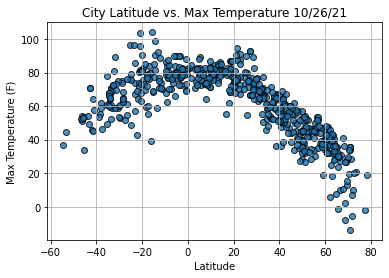

In [37]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

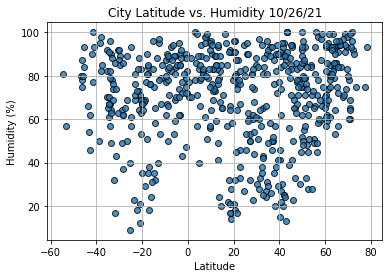

In [38]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

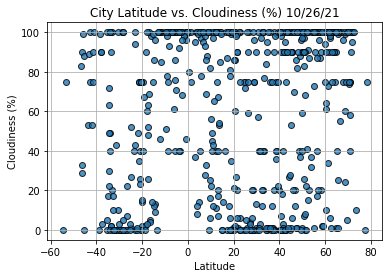

In [39]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

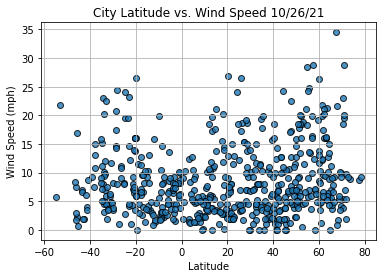

In [40]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()